TASK 1 
PREDICTION USING SUPERVISED ML
IMPORTING REQUIRED LIBRARIES AND LOADING THE DATA


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print('Libraries imported successfully')

Libraries imported successfully


In [ ]:
#loading dataset from online source
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print('Dataset Imported Successfully')

Dataset Imported Successfully


EXPLORATORY DATA ANALYSIS AND VISUALIZATION


In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.shape

(25, 2)

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0, 0.5, 'Percentage scored')

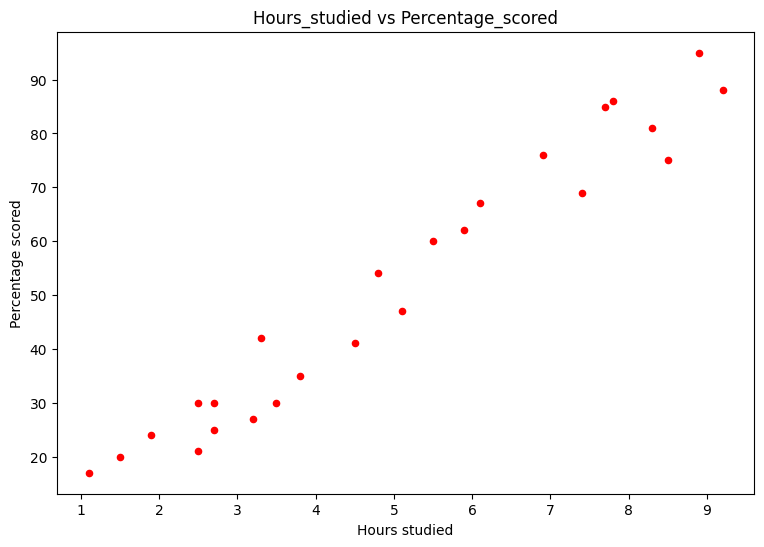

In [ ]:
df.plot(kind='scatter',x='Hours',y='Scores',figsize=(9,6),color='r')
plt.title("Hours_studied vs Percentage_scored")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")

We can observe that there is a positive linear relation between the 'Number of hours studied' and 'Percentage Scored


DATA PREPARATION


In [ ]:
x = df.iloc[:,:-1].values #independant variable
y = df.iloc[:,1].values #dependant variable

SPLITTING THE DATA INTO TRAINING AND TEST DATA

In [ ]:
#our objective is to train our model accordingto the years and salary by using training dataset
#then we test our model on the test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=0)

TRAINING THE ALGORITHM

In [ ]:
#fitting linear regression model into the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train) #actually produces the linear equation for the data
print("Training has been completed successfully")
print("cofficient :", regressor.coef_)
print("intercepts:", regressor.intercept_)

Training has been completed successfully
cofficient : [9.94167834]
intercepts: 1.9322042531516601


Text(0, 0.5, 'Percentage scored')

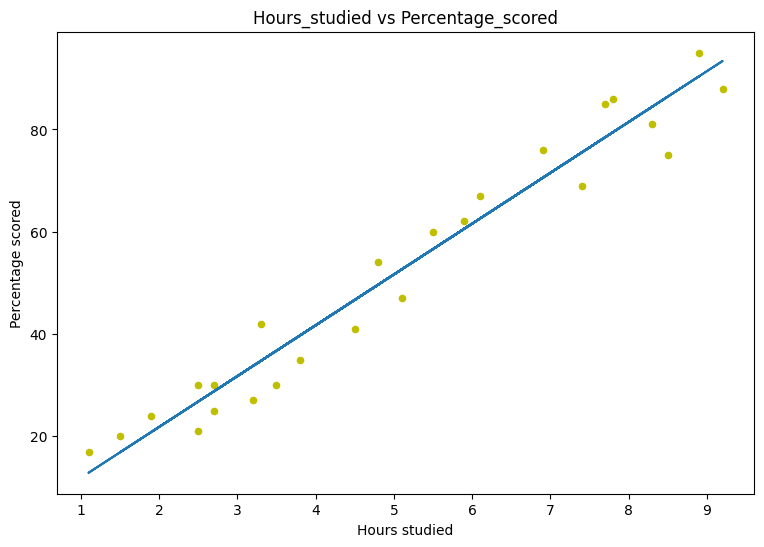

In [ ]:
#we can plot the fit line over the data in simple linear regression
line  = regressor.coef_*x+regressor.intercept_
df.plot(kind='scatter',x='Hours',y='Scores', figsize=(9,6),color='y')
plt.plot(x, line)
plt.title("Hours_studied vs Percentage_scored")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")

BLUE LINE IN THE ABOVE GRAPH REPRESENTS THE BEST-FIT LINE FOR THIS DATA

PREDICTING THE TEST DATASET RESULTS

In [ ]:


y_pred = regressor.predict(x_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [ ]:
y_test #y_test is the real scores of the test set.
       #y_pred are predicted scores.

array([20, 27, 69, 30, 62, 35, 24])

COMPARING THE ACTUAL AND PREDICTED SCORES

In [ ]:
#comparing actual vs predicted

df = pd.DataFrame({'Actual': y_test, 'predicted': y_pred})
df

,Actual,predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


EVALUATING THE MODEL/CALCULATING THE ACCURACY OF THE MODEL USING MEAN ABSOLUTE ERROR

In [ ]:
#find mean absolute error
#mean absolute error is the sum of absolute differences between our target and predicted variables

from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('r2_score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.130879918502482
r2_score: 0.9367661043365056


FINDING THE PREDICTED SCORE IF A STUDENT STUDIES 9.25HRS/DAY

In [ ]:
#solving the problem

hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341652
